## Online Banking Fraud/Counterfeit Detection
### Goal:
- Predict fraudulent/counterfeit cases in credit card transactions.

### Approach:
- Search and retrieve relevant data from Kaggle.
- Select relevant techniques to clean the data (missing values, outliers, wrong data types etc.)
- Choose the correct feature selection technique for a classification problem.
- Perform feature normalization on the data set.
- Use credit card transactions and the information on its account-holder as attributes (i.e., When does a customer buy, what does he buy, how often he pays on time, etc.)
- Label past transactions as fraud or fair transactions. This forms the class attribute.
- Build a model for the class of the transactions.
- Use this model to detect fraud by observing credit card transactions on an account.

## Solution
## Data Description
The data used was adopted from [Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection) in Kaggle. The data is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants. This dataset was obtained from the United States.

The dataset is split into a training data and test data in order to quantitfy the accuracy of the model.


>NOTE:
>In the approach given in the question it is indicated that we should label past transactions as fraud or fair transactions forming the target variable but we were able to get data with the fraud target variable. Therefore this is not a step that is addressed in this assignment. We used a supervised learning approach in this assignment
>
>

Only certain columns and from the kaggle dataset were incorporated into the dataset that was used and they are:

1. "Transaction Number" - Unique identifier for the Transactions
2. "Customer ID" - Unique identifier for the customers
3. "Time stamp" - Indicates time of the transaction
4. "Category" - This is the category of what was purchased
5. "Amount Transacted" - This is the amount of the transaction
6. "First Name" - First name of the customer
7. "Last" - Last name of the customer
8. "Gender" - Gender of customer
9. "Street" - Street name where the customer is registered
10. "City" - City name where the customer is registered
11. "Is fraud" - This is the target variable

New custom columns which were added are:

1. "Credit Limit" - Limit of credit that each customer is worth
2. "Number of Transactions" - Number of attempted transactions
3. "Amounts received per day" - Amounts received per day
4. "Card Type" - The card level type
5. "Authentication" - Whether the authenication passed or failed

**NOTE:** The values in the amount transacted column to were changed in order to better train the model. This is explained below:

287 entries were extracted from the kaggle dataset. However custom features were added as mentioned. The 287 entries include both fraudulent and legitimate transactions. To make the columns more meaningful the following logic was used:
1. The dataset was adjusted to only contains 1 or 2 legitimate transactions every day in order to make the 'number of transactions' column a useful predictor for fraud. The majority of the fraudulent transactions in the dataset had more than two transactions every day.
2. Each person received a particular card type with a set credit limit, and in some fraud cases, it was included situations where the limit is exceeded in order to make the credit limit and card type useful predictors for fraud. For a particular card type, there are different credit limits, for example the signature card has a credit limit of both 400,000 and 500,000, the gold card has a credit limit of 600,000, 700,000 and 750,000 and the platinum card has a credit limit of 900,000 and 1,000,000. 
3. An authentication field was included that returns success after a successful transaction, and fail whenever a transaction is unsuccessful. To make this column a useful predictor, fail cases were created for the fraudulent transactions.

# Python libraries 

In [5]:
#install package if not installed
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import datetime as dt
from sklearn.preprocessing import minmax_scale
from pandas.api.types import CategoricalDtype
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV


# Loading file

In [11]:
#Dataset
df = pd.read_csv("https://bit.ly/3Xq1tRD")
df.head(5)

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,1,12342,Platinum,Success
4,3958,4.96,3/1/2019 10:54,misc_net,1926072.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,1,1000000.0,3,17157,Platinum,Failed


In [ ]:
#Checking the column names
df.columns

Index(['Transaction_Number', 'Customer_ID', 'Time_stamp', 'Category',
       'Amount_Transacted', 'First', 'Last', 'Gender', 'Street', 'City',
       'Is_fraud', 'Credit_Limit', 'No_of_Transactions', 'Amounts_received',
       'Card_Type', 'Authentication'],
      dtype='object')

# Exploratory Data Analysis

In [ ]:
#describing the dataset
df.describe()

,Transaction_Number,Customer_ID,Amount_Transacted,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received
count,287.000000,287.000000,2.840000e+02,287.000000,286.000000,287.000000,287.000000
mean,108665.017422,5.814007,4.495447e+05,0.491289,710839.160839,2.205575,42716.344948
std,120134.353167,1.743172,2.577299e+05,0.500797,222556.112391,1.471015,54007.544128
min,19.000000,1.800000,1.056900e+05,0.000000,400000.000000,1.000000,0.000000
25%,16581.000000,4.040000,2.011172e+05,0.000000,500000.000000,1.000000,11090.500000
50%,54117.000000,6.300000,4.155305e+05,0.000000,700000.000000,2.000000,31044.000000
75%,194905.000000,7.330000,6.000082e+05,1.000000,900000.000000,3.000000,55323.000000
max,455398.000000,7.540000,1.926072e+06,1.000000,1000000.000000,9.000000,832630.000000


## Finding and Replacing Missing Values

In [ ]:
#checking for missing values
df.isnull().any()

Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted      True
First                 False
Last                  False
Gender                False
Street                 True
City                  False
Is_fraud              False
Credit_Limit           True
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

In [ ]:
#Checking the number of missing values in each column
df.isnull().sum()

Transaction_Number    0
Customer_ID           0
Time_stamp            0
Category              0
Amount_Transacted     3
First                 0
Last                  0
Gender                0
Street                7
City                  0
Is_fraud              0
Credit_Limit          1
No_of_Transactions    0
Amounts_received      0
Card_Type             0
Authentication        0
dtype: int64

In [ ]:
#checking specific columns with null values
df.columns[df.isnull().any()] 

Index(['Amount_Transacted', 'Street', 'Credit_Limit'], dtype='object')

In [ ]:
#locating all rows of data with null values
nan_rows  = df.loc[df.isna().any(axis=1)] 
nan_rows

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
32,85218,6.59,20/02/2019 22:05,misc_net,326162.0,Amanda,Molina,Female,NaN,Philadelphia,1,1000000.0,1,0,Platinum,Success
33,90210,6.59,20/02/2019 22:10,misc_net,390534.0,Amanda,Molina,Female,NaN,Philadelphia,1,1000000.0,2,0,Platinum,Success
34,40230,6.59,20/02/2019 22:18,misc_net,204850.0,Amanda,Molina,Female,NaN,Philadelphia,1,1000000.0,3,0,Platinum,Success
35,77770,6.59,20/02/2019 22:31,misc_net,331349.0,Amanda,Molina,Female,NaN,Philadelphia,1,1000000.0,4,0,Platinum,Success
36,22045,6.59,20/02/2019 22:51,misc_net,515263.0,Amanda,Molina,Female,NaN,Philadelphia,1,NaN,5,0,Platinum,Success
43,23536,2.23,14/01/2019 19:17,entertainment,NaN,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000.0,1,66024,Gold,Success
54,29421,6.04,5/2/2019 7:25,misc_pos,688577.0,Bradley,Martinez,Male,NaN,Cape Town,1,900000.0,1,83263,Platinum,Success
55,54021,6.04,5/2/2019 8:25,misc_pos,390534.0,Bradley,Martinez,Male,NaN,Cape Towm,1,900000.0,2,0,Platinum,Success
143,196817,3.86,11/4/2019 18:11,home,NaN,Jacqueline,Curry,Female,3047 Jeff Place,Marathon,0,900000.0,3,97438,Platinum,Success
148,203323,3.86,14/04/2019 13:19,food_dining,NaN,Jacqueline,Curry,Female,3047 Jeff Place,Marathon,0,900000.0,2,99070,Platinum,Success


In [ ]:
#locating customer ID's with null values
customer_ID_nan = nan_rows['Customer_ID'].unique() 
print(customer_ID_nan)

[6.59 2.23 6.04 3.86]


In [ ]:
#updating missing values
#calling first names
First = nan_rows['First'].unique()
print(First)
print (customer_ID_nan)
print (First[0])

#Generating indexes
id = [i for i in range (len(customer_ID_nan))] 
print (id)
id_values = [  id, customer_ID_nan, First] 
id_tables = pd.DataFrame(id_values) 
id_tables

['Amanda' 'Thomas' 'Bradley' 'Jacqueline']
[6.59 2.23 6.04 3.86]
Amanda
[0, 1, 2, 3]


,0,1,2,3
0,0,1,2,3
1,6.59,2.23,6.04,3.86
2,Amanda,Thomas,Bradley,Jacqueline


### Replacing Missing Values for Amanda ID 6.59

Because there are few missing entries they were handled invidually per CustomerID and Name

In [ ]:
#insert cutomer ID 4.96 in a data frame
Amanda = df.loc[(customer_ID_nan[0]) == df ['Customer_ID']]
Amanda.head(3)

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
16,51250,6.59,30/01/2019 23:16,kids_pets,297820.0,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000.0,2,42187,Platinum,Success
17,51528,6.59,31/01/2019 05:41,grocery_net,687879.0,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000.0,3,98637,Platinum,Success
18,53779,6.59,1/2/2019 20:58,personal_care,738456.0,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000.0,1,21304,Platinum,Success


In [ ]:
#Finding Missing Values for Amanda
Amanda.isnull().any() 

Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted     False
First                 False
Last                  False
Gender                False
Street                 True
City                  False
Is_fraud              False
Credit_Limit           True
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

In [ ]:
#Filling in missing values for street
Amanda['Street'] = Amanda['Street'].replace({np.nan: '8425 Daniel Knolls Suite 288'}) ;
Amanda['Street']

C:\Users\Julie\AppData\Local\Temp\ipykernel_4948\3038690587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amanda['Street'] = Amanda['Street'].replace({np.nan: '8425 Daniel Knolls Suite 288'}) ;


16    8425 Daniel Knolls Suite 288
17    8425 Daniel Knolls Suite 288
18    8425 Daniel Knolls Suite 288
19    8425 Daniel Knolls Suite 288
20    8425 Daniel Knolls Suite 288
21    8425 Daniel Knolls Suite 288
22    8425 Daniel Knolls Suite 288
23    8425 Daniel Knolls Suite 288
24    8425 Daniel Knolls Suite 288
25    8425 Daniel Knolls Suite 288
26    8425 Daniel Knolls Suite 288
27    8425 Daniel Knolls Suite 288
28    8425 Daniel Knolls Suite 288
29    8425 Daniel Knolls Suite 288
30    8425 Daniel Knolls Suite 288
31    8425 Daniel Knolls Suite 288
32    8425 Daniel Knolls Suite 288
33    8425 Daniel Knolls Suite 288
34    8425 Daniel Knolls Suite 288
35    8425 Daniel Knolls Suite 288
36    8425 Daniel Knolls Suite 288
Name: Street, dtype: object

In [ ]:
#Checking missing values for credit limit
Amanda['Credit_Limit']

16    1000000.0
17    1000000.0
18    1000000.0
19    1000000.0
20    1000000.0
21    1000000.0
22    1000000.0
23    1000000.0
24    1000000.0
25    1000000.0
26    1000000.0
27    1000000.0
28    1000000.0
29    1000000.0
30    1000000.0
31    1000000.0
32    1000000.0
33    1000000.0
34    1000000.0
35    1000000.0
36          NaN
Name: Credit_Limit, dtype: float64

In [ ]:
#Filling in missing values for Credit limit
Amanda['Credit_Limit'] = Amanda['Credit_Limit'].replace({np.nan:1000000.0})
Amanda['Credit_Limit']

C:\Users\Julie\AppData\Local\Temp\ipykernel_4948\911720258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amanda['Credit_Limit'] = Amanda['Credit_Limit'].replace({np.nan:1000000.0})


16    1000000.0
17    1000000.0
18    1000000.0
19    1000000.0
20    1000000.0
21    1000000.0
22    1000000.0
23    1000000.0
24    1000000.0
25    1000000.0
26    1000000.0
27    1000000.0
28    1000000.0
29    1000000.0
30    1000000.0
31    1000000.0
32    1000000.0
33    1000000.0
34    1000000.0
35    1000000.0
36    1000000.0
Name: Credit_Limit, dtype: float64

In [ ]:
#confirming no missing values left in Data Frame Amanda
Amanda.isnull().any() 


Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted     False
First                 False
Last                  False
Gender                False
Street                False
City                  False
Is_fraud              False
Credit_Limit          False
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

### Replacing Missing Values for Thomas ID 2.23


In [ ]:
#loading data for customer ID
Thomas = df.loc[(customer_ID_nan[1])== df['Customer_ID']]
Thomas.head()

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
37,19277,2.23,12/1/2019 18:03,home,563751.0,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000.0,1,22770,Gold,Success
38,20013,2.23,13/01/2019 04:41,gas_transport,161930.0,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000.0,2,86409,Gold,Success
39,21708,2.23,14/01/2019 00:05,grocery_net,352806.0,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000.0,3,44060,Gold,Success
40,22174,2.23,14/01/2019 05:50,grocery_net,207755.0,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000.0,1,95466,Gold,Success
41,22386,2.23,14/01/2019 08:35,misc_pos,489540.0,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000.0,1,25557,Gold,Success


In [ ]:
#Amount transacted has null values in dataset Thomas
Thomas.isnull().any()

Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted      True
First                 False
Last                  False
Gender                False
Street                False
City                  False
Is_fraud              False
Credit_Limit          False
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

In [ ]:
#finding the missing value
Thomas ['Amount_Transacted']

37    563751.0
38    161930.0
39    352806.0
40    207755.0
41    489540.0
42    274395.0
43         NaN
44    105690.0
45    694888.0
Name: Amount_Transacted, dtype: float64

In [ ]:
#Replacing the missing values
Thomas ['Amount_Transacted'] = Thomas ['Amount_Transacted'].fillna(Thomas ['Amount_Transacted'].mean())
Thomas ['Amount_Transacted'] 

C:\Users\Julie\AppData\Local\Temp\ipykernel_4948\3659599552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thomas ['Amount_Transacted'] = Thomas ['Amount_Transacted'].fillna(Thomas ['Amount_Transacted'].mean())


37    563751.000
38    161930.000
39    352806.000
40    207755.000
41    489540.000
42    274395.000
43    356344.375
44    105690.000
45    694888.000
Name: Amount_Transacted, dtype: float64

In [ ]:
#Verifying missing values have been removed
Thomas.isnull().any()

Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted     False
First                 False
Last                  False
Gender                False
Street                False
City                  False
Is_fraud              False
Credit_Limit          False
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

### Replacing Missing Values for Bradley 6.04

In [ ]:
#loading data for customer ID
Bradley = df.loc[(customer_ID_nan[2])== df['Customer_ID']]
Bradley.head(3)

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
51,586,6.04,1/1/2019 7:36,grocery_pos,640653.0,Bradley,Martinez,Male,3426 David Divide Suite 717,Burns Flat,0,900000.0,3,89201,Platinum,Success
52,5240,6.04,4/1/2019 10:07,grocery_pos,745493.0,Bradley,Martinez,Male,3426 David Divide Suite 717,Burns Flat,0,900000.0,2,31362,Platinum,Success
53,5886,6.04,4/1/2019 19:25,home,868021.0,Bradley,Martinez,Male,3426 David Divide Suite 717,Burns Flat,0,900000.0,3,31436,Platinum,Success


In [ ]:
#Checking for missing values
Bradley.isnull().any()

Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted     False
First                 False
Last                  False
Gender                False
Street                 True
City                  False
Is_fraud              False
Credit_Limit          False
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

In [ ]:
#Replacing Missing values
Bradley['Street'] = Bradley['Street'].replace({np.nan: '3426 David Divide Suite 717'})
Bradley['Street']

C:\Users\Julie\AppData\Local\Temp\ipykernel_4948\2448734297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bradley['Street'] = Bradley['Street'].replace({np.nan: '3426 David Divide Suite 717'})


51    3426 David Divide Suite 717
52    3426 David Divide Suite 717
53    3426 David Divide Suite 717
54    3426 David Divide Suite 717
55    3426 David Divide Suite 717
56    3426 David Divide Suite 717
57    3426 David Divide Suite 717
58    3426 David Divide Suite 717
59    3426 David Divide Suite 717
Name: Street, dtype: object

In [ ]:
#Verifying missing values have been removed
Bradley.isnull().any()

Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted     False
First                 False
Last                  False
Gender                False
Street                False
City                  False
Is_fraud              False
Credit_Limit          False
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

### Replacing Missing Values for Jacqueline ID 3.86

In [ ]:
#loading data for customer ID
Jacqueline = df.loc[(customer_ID_nan[3])== df['Customer_ID']]
Jacqueline.head(3)

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
138,191696,3.86,8/4/2019 19:54,misc_pos,389097.0,Jacqueline,Curry,Female,3047 Jeff Place,Marathon,0,900000.0,1,49884,Platinum,Success
139,192429,3.86,9/4/2019 1:15,gas_transport,880778.0,Jacqueline,Curry,Female,3047 Jeff Place,Marathon,0,900000.0,2,75261,Platinum,Success
140,193412,3.86,9/4/2019 18:31,personal_care,327971.0,Jacqueline,Curry,Female,3047 Jeff Place,Marathon,0,900000.0,2,49454,Platinum,Success


In [ ]:
#Jacqueline has missing value(s) Amount Transacted
Jacqueline.isnull().any()

Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted      True
First                 False
Last                  False
Gender                False
Street                False
City                  False
Is_fraud              False
Credit_Limit          False
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

In [ ]:
#Replacing Missing values
Jacqueline['Amount_Transacted'] = Jacqueline['Amount_Transacted'].fillna(Jacqueline['Amount_Transacted'].mean())
Jacqueline['Amount_Transacted'] 

C:\Users\Julie\AppData\Local\Temp\ipykernel_4948\340347097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jacqueline['Amount_Transacted'] = Jacqueline['Amount_Transacted'].fillna(Jacqueline['Amount_Transacted'].mean())


138    389097.000000
139    880778.000000
140    327971.000000
141    689201.000000
142    792440.000000
143    559446.181818
144    502399.000000
145    272804.000000
146    613280.000000
147    876491.000000
148    559446.181818
149    294184.000000
150    515263.000000
Name: Amount_Transacted, dtype: float64

In [ ]:
#confirming all the missing values are treated
Jacqueline.isnull().any()

Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted     False
First                 False
Last                  False
Gender                False
Street                False
City                  False
Is_fraud              False
Credit_Limit          False
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

In [ ]:
#concatenating all cleaned Customer ID's into a new data frame
frames = [Amanda, Thomas, Bradley, Jacqueline] 
df_frames = pd.concat(frames)
df_frames.head(3)

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
16,51250,6.59,30/01/2019 23:16,kids_pets,297820.0,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000.0,2,42187,Platinum,Success
17,51528,6.59,31/01/2019 05:41,grocery_net,687879.0,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000.0,3,98637,Platinum,Success
18,53779,6.59,1/2/2019 20:58,personal_care,738456.0,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000.0,1,21304,Platinum,Success


In [ ]:
#align cleaned dataframe to initial dataframe
d_frame = df_frames.reindex(df.index) #align df_frames to df
d_frame

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#replace df's null values with df_frame
df2 = df.fillna(df_frames) #replace df's null values with df_frame
df2.head(3)

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,1,10173,Platinum,Success


In [ ]:
df = df2.copy()
df.head(3)

,Transaction_Number,Customer_ID,Time_stamp,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received,Card_Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,Male,269 Sanchez Rapids,Elizabeth,0,1000000.0,1,10173,Platinum,Success


In [ ]:
#Confirming Missing values have been removed
df.isnull().any()

Transaction_Number    False
Customer_ID           False
Time_stamp            False
Category              False
Amount_Transacted     False
First                 False
Last                  False
Gender                False
Street                False
City                  False
Is_fraud              False
Credit_Limit          False
No_of_Transactions    False
Amounts_received      False
Card_Type             False
Authentication        False
dtype: bool

## Formating Dataset Columns

In [ ]:
#Summary of the data without missing values
df.describe(datetime_is_numeric=True)

,Transaction_Number,Customer_ID,Amount_Transacted,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received
count,287.000000,287.000000,2.870000e+02,287.000000,287.000000,287.000000,287.000000
mean,108665.017422,5.814007,4.499858e+05,0.491289,711846.689895,2.205575,42716.344948
std,120134.353167,1.743172,2.565981e+05,0.500797,222821.397122,1.471015,54007.544128
min,19.000000,1.800000,1.056900e+05,0.000000,400000.000000,1.000000,0.000000
25%,16581.000000,4.040000,2.021625e+05,0.000000,500000.000000,1.000000,11090.500000
50%,54117.000000,6.300000,4.180090e+05,0.000000,700000.000000,2.000000,31044.000000
75%,194905.000000,7.330000,5.998745e+05,1.000000,900000.000000,3.000000,55323.000000
max,455398.000000,7.540000,1.926072e+06,1.000000,1000000.000000,9.000000,832630.000000


In [ ]:
#Converting Datetime column to date time
df['Time_stamp'] = pd.to_datetime(df['Time_stamp'])

In [ ]:
#Checking  the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction_Number  287 non-null    int64         
 1   Customer_ID         287 non-null    float64       
 2   Time_stamp          287 non-null    datetime64[ns]
 3   Category            287 non-null    object        
 4   Amount_Transacted   287 non-null    float64       
 5   First               287 non-null    object        
 6   Last                287 non-null    object        
 7   Gender              287 non-null    object        
 8   Street              287 non-null    object        
 9   City                287 non-null    object        
 10  Is_fraud            287 non-null    int64         
 11  Credit_Limit        287 non-null    float64       
 12  No_of_Transactions  287 non-null    int64         
 13  Amounts_received    287 non-null    int64         

In [ ]:
#Recognising categorical variables as categorical.
#Converting categorical columns to categorical 
df['Category'] = pd.Categorical(df['Category'])
df['Gender'] = pd.Categorical(df['Gender'])
df['City'] = pd.Categorical(df['City'])
df['Credit_Limit'] = pd.Categorical(df['Credit_Limit'])
df['No_of_Transactions'] = pd.Categorical(df['No_of_Transactions'])
df['Card_Type'] = pd.Categorical(df['Card_Type'])
df['Is_fraud']= pd.Categorical(df['Is_fraud'])
df['Authentication'] = pd.Categorical(df['Authentication'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction_Number  287 non-null    int64         
 1   Customer_ID         287 non-null    float64       
 2   Time_stamp          287 non-null    datetime64[ns]
 3   Category            287 non-null    category      
 4   Amount_Transacted   287 non-null    float64       
 5   First               287 non-null    object        
 6   Last                287 non-null    object        
 7   Gender              287 non-null    category      
 8   Street              287 non-null    object        
 9   City                287 non-null    category      
 10  Is_fraud            287 non-null    category      
 11  Credit_Limit        287 non-null    category      
 12  No_of_Transactions  287 non-null    category      
 13  Amounts_received    287 non-null    int64         

In [ ]:
#Making new colums with codes instead of string
df['Category_code'] = df['Category'].cat.codes
df['Gender_code'] = df['Gender'].cat.codes
df['City_code'] = df['City'].cat.codes
df['Credit_Limit_code'] = df['Credit_Limit'].cat.codes
df['No_of_Transactions_code'] = df['No_of_Transactions'].cat.codes
df['Card_Type_code'] = df['Card_Type'].cat.codes
df['Is_fraud_code']= df['Is_fraud'].cat.codes
df['Authentication_code']= df['Authentication'].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Transaction_Number       287 non-null    int64         
 1   Customer_ID              287 non-null    float64       
 2   Time_stamp               287 non-null    datetime64[ns]
 3   Category                 287 non-null    category      
 4   Amount_Transacted        287 non-null    float64       
 5   First                    287 non-null    object        
 6   Last                     287 non-null    object        
 7   Gender                   287 non-null    category      
 8   Street                   287 non-null    object        
 9   City                     287 non-null    category      
 10  Is_fraud                 287 non-null    category      
 11  Credit_Limit             287 non-null    category      
 12  No_of_Transactions       287 non-nul

In [ ]:
#Checking which categories belong to which code
categories = df['Category_code'].groupby(df['Category']).unique().apply(pd.Series)
gender = df['Gender_code'].groupby(df['Gender']).unique().apply(pd.Series)
cities =df['City_code'].groupby(df['City']).unique().apply(pd.Series)
credit_limit = df['Credit_Limit_code'].groupby(df['Credit_Limit']).unique().apply(pd.Series)
transactions =df['No_of_Transactions_code'].groupby(df['No_of_Transactions']).unique().apply(pd.Series)
cards =df['Card_Type_code'].groupby(df['Card_Type']).unique().apply(pd.Series)
fraud=df['Is_fraud_code'].groupby(df['Is_fraud']).unique().apply(pd.Series)
auth = df['Authentication_code'].groupby(df['Authentication']).unique().apply(pd.Series)
print(categories)
print(gender)
print(cities) 
print(credit_limit)
print(transactions)
print(cards)
print(fraud)
print(auth)

                 0
Category          
entertainment    0
food_dining      1
gas_transport    2
grocery_net      3
grocery_pos      4
health_fitness   5
home             6
kids_pets        7
misc_net         8
misc_pos         9
personal_care   10
shopping_net    11
shopping_pos    12
travel          13
        0
Gender   
Female  0
Male    1
                         0
City                      
Alpharetta               0
Aurora                   1
Bigelow                  2
Browning                 3
Burns Flat               4
Campbell                 5
Cape Towm                6
Cape Town                7
Cazenovia                8
Collettsville            9
Coulee Dam              10
De Lancey               11
De Queen                12
Deadwood                13
Easton                  14
Elizabeth               15
Fields Landing          16
Gibsonville             17
Ironton                 18
Iselin                  19
Kirtland Afb            20
Laredo                  21
Louisvil

In [ ]:
#Make new dataframe without string variables that have been converted to code and transaction Number column which is not being used in this analysis.
df2 = df.drop(['Transaction_Number','First','Last','Street','Category', 'Gender', 'City','Credit_Limit', 'Card_Type', 'No_of_Transactions', 'Card_Type', 'Is_fraud', 'Authentication'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customer_ID              287 non-null    float64       
 1   Time_stamp               287 non-null    datetime64[ns]
 2   Amount_Transacted        287 non-null    float64       
 3   Amounts_received         287 non-null    int64         
 4   Category_code            287 non-null    int8          
 5   Gender_code              287 non-null    int8          
 6   City_code                287 non-null    int8          
 7   Credit_Limit_code        287 non-null    int8          
 8   No_of_Transactions_code  287 non-null    int8          
 9   Card_Type_code           287 non-null    int8          
 10  Is_fraud_code            287 non-null    int8          
 11  Authentication_code      287 non-null    int8          
dtypes: datetime64[ns](1), float64(2), in

## Detecting Outliers

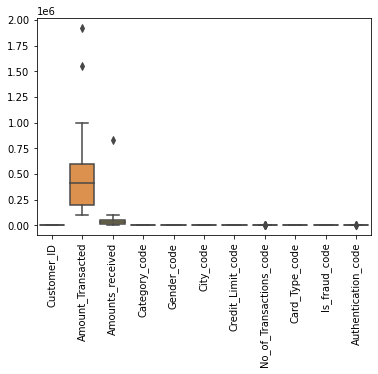

In [ ]:
#Detecting using a box plot
sns.boxplot(data = df2)#outliers in the whole dataset
plt.xticks(rotation = 90);

From the box plot we can see that amount transacted, amount recieved No of transaction and authentication have outliers. We are going to verify this using the functions below.

In [ ]:
#function to detect outliers in numerical variables
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
#using the function to detect outliers in numerical variables
for column in df2:
    mycolumn= df2[column]
    outliers = find_outliers_IQR(mycolumn)
    print(f"number of outliers in {column} is: {str(len(outliers))}")

number of outliers in Customer_ID is: 0
number of outliers in Time_stamp is: 2
number of outliers in Amount_Transacted is: 2
number of outliers in Amounts_received is: 1
number of outliers in Category_code is: 0
number of outliers in Gender_code is: 0
number of outliers in City_code is: 0
number of outliers in Credit_Limit_code is: 0
number of outliers in No_of_Transactions_code is: 6
number of outliers in Card_Type_code is: 0
number of outliers in Is_fraud_code is: 0
number of outliers in Authentication_code is: 4


Because No of transactions and authenitication are categorical we wuill not remove the outliers in this columns because they are meaningful. Time stamp is also meaningful and so outliers will not be removed.

### Dropping the outliers in amount transacted

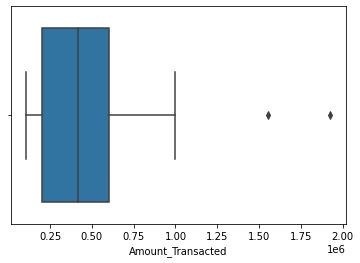

In [ ]:
#Checking outliers under Amount_Transacted
sns.boxplot(data = df2, x = "Amount_Transacted")
plt.show()

In [ ]:
#Identifying the outliers
outliers = find_outliers_IQR(df2['Amount_Transacted'])
outliers

4     1926072.0
97    1553907.0
Name: Amount_Transacted, dtype: float64

In [ ]:
#Summary for amount transacted
df2['Amount_Transacted'].describe()

count    2.870000e+02
mean     4.499858e+05
std      2.565981e+05
min      1.056900e+05
25%      2.021625e+05
50%      4.180090e+05
75%      5.998745e+05
max      1.926072e+06
Name: Amount_Transacted, dtype: float64

In [ ]:
#Lower boundary
Q1_1 = df2['Amount_Transacted'].quantile(0.25) #
Q1_1

202162.5

In [ ]:
#Upper boundary
Q3_1 = df2['Amount_Transacted'].quantile(0.75)
Q3_1

599874.5

In [ ]:
#Calculating the interquartile range
IQR_1 = Q3_1 - Q1_1
IQR_1

397712.0

In [ ]:
#Calculating the outlier cut-off
Lower_lim_1 = Q1_1 - 1.5 * IQR_1
Lower_lim_1

-394405.5

In [ ]:
# Identifying the outliers after the upper limit in amount transacted
Upper_lim_1 = Q3_1 + 1.5 *IQR_1
Upper_lim_1

1196442.5

In [ ]:
# Identifying the outliers after the lower limit in amount transacted
outliers_15_low_1 = df2['Amount_Transacted'] < Lower_lim_1
outliers_15_low_1

0      False
1      False
2      False
3      False
4      False
       ...  
282    False
283    False
284    False
285    False
286    False
Name: Amount_Transacted, Length: 287, dtype: bool

In [ ]:
#Identifying the outliers after the upper limit in amount transacted
outliers_15_up_1 = df2['Amount_Transacted'] > Upper_lim_1
outliers_15_up_1

0      False
1      False
2      False
3      False
4       True
       ...  
282    False
283    False
284    False
285    False
286    False
Name: Amount_Transacted, Length: 287, dtype: bool

In [ ]:
#Checking the length of the dataset with outliers in amount transacted
len(df2['Amount_Transacted']) - (len(df2['Amount_Transacted'][outliers_15_low_1]) + len(df2['Amount_Transacted'][outliers_15_up_1]))

285

In [ ]:
#Removing the outliers in the lower and upper boundary
df2['Amount_Transacted'][~(outliers_15_low_1 | outliers_15_up_1)]

0      965721.0
1      413052.0
2      584822.0
3      980146.0
5      482394.0
         ...   
282    400006.0
283    200301.0
284    200282.0
285    200007.0
286    600368.0
Name: Amount_Transacted, Length: 285, dtype: float64

In [ ]:
#Making new dataframe with outliers in amount transacted removed
df_1 = df2[~(outliers_15_low_1 | outliers_15_up_1)]#new dataframe
df_1

,Customer_ID,Time_stamp,Amount_Transacted,Amounts_received,Category_code,Gender_code,City_code,Credit_Limit_code,No_of_Transactions_code,Card_Type_code,Is_fraud_code,Authentication_code
0,4.96,2019-01-01 00:12:00,965721.0,82475,4,1,15,6,1,1,0,1
1,4.96,2019-01-01 12:44:00,413052.0,32555,1,1,15,6,0,1,0,1
2,4.96,2019-02-01 00:25:00,584822.0,10173,2,1,15,6,0,1,0,1
3,4.96,2019-02-01 12:01:00,980146.0,12342,9,1,15,6,0,1,0,1
5,4.96,2019-03-01 15:19:00,482394.0,10003,11,1,15,6,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
282,7.52,2019-02-02 03:19:00,400006.0,30325,2,1,43,2,0,0,1,1
283,7.54,2019-03-25 01:44:00,200301.0,10008,4,0,10,1,0,2,1,1
284,7.54,2019-03-25 01:48:00,200282.0,10328,4,0,10,1,1,2,1,1
285,7.54,2019-03-25 03:58:00,200007.0,10013,2,0,10,1,2,2,1,1


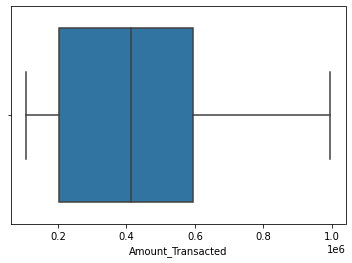

In [ ]:
#box plot to check if the outliers are treated
sns.boxplot( x = df_1['Amount_Transacted'])
plt.show()

### Dropping the outliers in amount recieved

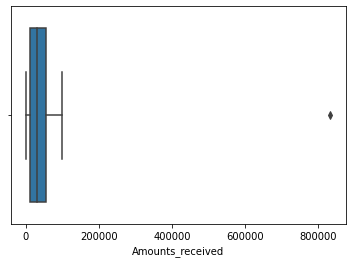

In [ ]:
#checking column Amounts_received for outliers
sns.boxplot(data = df2, x = "Amounts_received")
plt.show()

In [ ]:
#Identifying the outliers using the function
outliers = find_outliers_IQR(df_1['Amounts_received'])
outliers

122    832630
Name: Amounts_received, dtype: int64

In [ ]:
#Summary for amount recieved column
df_1['Amounts_received'].describe()

count       285.000000
mean      42782.933333
std       54174.703614
min           0.000000
25%       11050.000000
50%       31044.000000
75%       55512.000000
max      832630.000000
Name: Amounts_received, dtype: float64

In [ ]:
#lower limits
Q1_2 = df_1['Amounts_received'].quantile(0.25)
Q1_2

11050.0

In [ ]:
#upper limits
Q3_2 = df_1['Amounts_received'].quantile(0.75)
Q3_2

55512.0

In [ ]:
#calculating interquartile range
IQR_2 = Q3_2 - Q1_2
IQR_2

44462.0

In [ ]:
#Calculating the outlier cut-off for the lower limit
Lower_lim_2 = Q1_2 - 1.5 * IQR_2
Lower_lim_2

-55643.0

In [ ]:
#Calculating the outlier cut-off for the upper limit
Upper_lim_2 = Q3_2 + 1.5 *IQR_2
Upper_lim_2

122205.0

In [ ]:
#Identifying the outliers after the lower limit in amount recieved
outliers_15_low_2 = df_1['Amounts_received'] < Lower_lim_2
outliers_15_low_2

0      False
1      False
2      False
3      False
5      False
       ...  
282    False
283    False
284    False
285    False
286    False
Name: Amounts_received, Length: 285, dtype: bool

In [ ]:
#Identifying the outliers after the upper limit in amount recieved
outliers_15_up_2 = df_1['Amounts_received'] > Upper_lim_2
outliers_15_up_2

0      False
1      False
2      False
3      False
5      False
       ...  
282    False
283    False
284    False
285    False
286    False
Name: Amounts_received, Length: 285, dtype: bool

In [ ]:
#Checking the length of the column with outliers
len(df_1['Amounts_received']) - (len(df_1['Amounts_received'][outliers_15_low_2]) + len(df_1['Amounts_received'][outliers_15_up_2]))

284

In [ ]:
#Removing outliers in the lower bound of the amount recieved column
df_1['Amounts_received'][~(outliers_15_low_2 | outliers_15_up_2)]

0      82475
1      32555
2      10173
3      12342
5      10003
       ...  
282    30325
283    10008
284    10328
285    10013
286    50916
Name: Amounts_received, Length: 284, dtype: int64

In [ ]:
#Making new dataframe with no outliers in amount recieved column
df_2 = df_1[~(outliers_15_low_2 | outliers_15_up_2)]
df_2

,Customer_ID,Time_stamp,Amount_Transacted,Amounts_received,Category_code,Gender_code,City_code,Credit_Limit_code,No_of_Transactions_code,Card_Type_code,Is_fraud_code,Authentication_code
0,4.96,2019-01-01 00:12:00,965721.0,82475,4,1,15,6,1,1,0,1
1,4.96,2019-01-01 12:44:00,413052.0,32555,1,1,15,6,0,1,0,1
2,4.96,2019-02-01 00:25:00,584822.0,10173,2,1,15,6,0,1,0,1
3,4.96,2019-02-01 12:01:00,980146.0,12342,9,1,15,6,0,1,0,1
5,4.96,2019-03-01 15:19:00,482394.0,10003,11,1,15,6,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
282,7.52,2019-02-02 03:19:00,400006.0,30325,2,1,43,2,0,0,1,1
283,7.54,2019-03-25 01:44:00,200301.0,10008,4,0,10,1,0,2,1,1
284,7.54,2019-03-25 01:48:00,200282.0,10328,4,0,10,1,1,2,1,1
285,7.54,2019-03-25 03:58:00,200007.0,10013,2,0,10,1,2,2,1,1


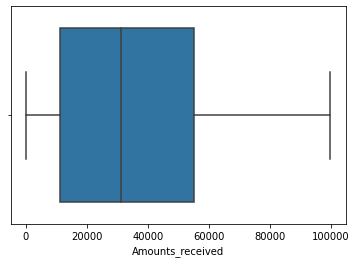

In [ ]:
# verifying the outliers are removed with a box plot
sns.boxplot( x = df_2['Amounts_received'])
plt.show()

## Feature Selection
In the exploratory data analysis section missing values were detected and replaced and outliers in the amount transacted and amount received columns were dropped.
The new dataset is used to to perform feature selection using the is_fraud column as the target variable. 

In [ ]:
#Converting Time variable to ordinal so it can be considered as one of the features
df_2['Time_stamp']=df_2['Time_stamp'].apply(pd.Timestamp.toordinal)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customer_ID              287 non-null    float64       
 1   Time_stamp               287 non-null    datetime64[ns]
 2   Amount_Transacted        287 non-null    float64       
 3   Amounts_received         287 non-null    int64         
 4   Category_code            287 non-null    int8          
 5   Gender_code              287 non-null    int8          
 6   City_code                287 non-null    int8          
 7   Credit_Limit_code        287 non-null    int8          
 8   No_of_Transactions_code  287 non-null    int8          
 9   Card_Type_code           287 non-null    int8          
 10  Is_fraud_code            287 non-null    int8          
 11  Authentication_code      287 non-null    int8          
dtypes: datetime64[ns](1), float64(2), in

C:\Users\Julie\AppData\Local\Temp\ipykernel_4948\2594616004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Time_stamp']=df_2['Time_stamp'].apply(pd.Timestamp.toordinal)


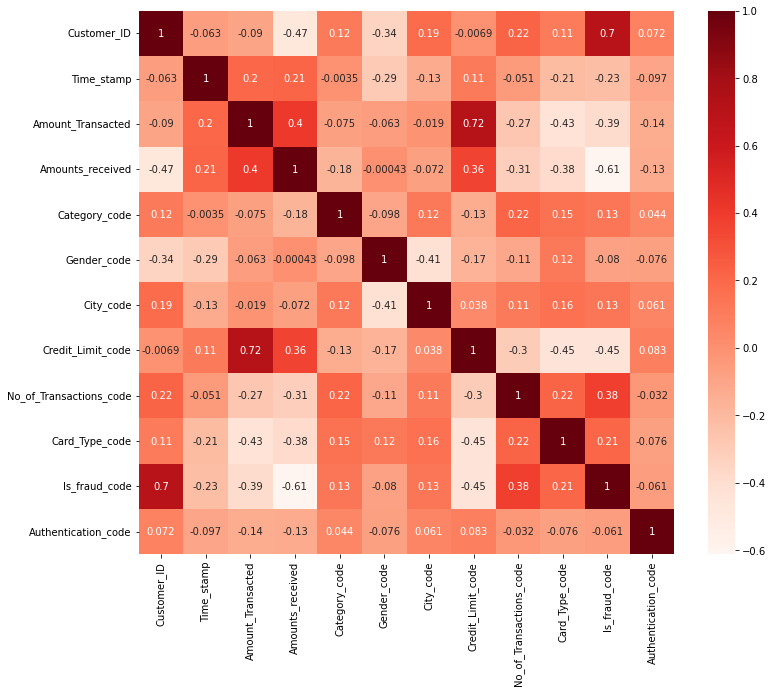

In [ ]:
# Using Pearson Correlation of all features (including target)
plt.figure(figsize=(12,10))                      # creating a plot figure        
cor = df_2.corr()                                  #compute correlation
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)   # plot heatmap
plt.show()                                       # show heatmap

From the plot above, credit limit and amount transacted show strong correlation, hence further testing with backward elimination is shown below.

### Backward Feature Elimination
This process goes through the following process
1. Select a P-value level which is selected as 0.05
2. Fit the model with all features
3. Which feature has highest P-value?
4. Remove the feature with highest P-value
5. Fit the model again (Step 2) 
6. Repeat the Backward Elimination until we remove all features with p-value higher the significance level


The code below iterates through the predictors until only the significant variables are chosen

In [ ]:
# Choosing target variable and feature matrix
target_norm = df_2['Is_fraud_code']
features_norm = df_2.drop("Is_fraud_code", axis=1)

In [ ]:
#Backward Elimination for the dataset
X = features_norm
y = target_norm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Customer_ID', 'Time_stamp', 'Amounts_received', 'Credit_Limit_code', 'No_of_Transactions_code', 'Card_Type_code', 'Authentication_code']


Based on the backward feature selection process, the variables 'Customer_ID', 'Time_stamp', 'Amounts_received', 'Gender_code', 'City_code', 'Credit_Limit_code', 'No_of_Transactions_code', 'Card_Type_code', 'Authentication_code' have been selected. Because amount transacted and credit limit were highly correlated, Amount transacted was deemed significant.

## Feature Normalization and Standardization
Feature normalization and feature standardisation was performed for the dataset to see if there is a difference in output when the data is normalised vs when it is standardised. 


### Feature Normalization

In [ ]:
#Normalizing Amount transacted and amount recieved
#Creating copy of dataset
df_norm = df_2.copy()
cols = df_2.columns
df_norm[cols] = minmax_scale(df_norm[cols])
df_norm.head()

,Customer_ID,Time_stamp,Amount_Transacted,Amounts_received,Category_code,Gender_code,City_code,Credit_Limit_code,No_of_Transactions_code,Card_Type_code,Is_fraud_code,Authentication_code
0,0.550523,0.000000,0.965675,0.826345,0.307692,1.0,0.319149,1.0,0.125,0.5,0.0,1.0
1,0.550523,0.000000,0.345118,0.326180,0.076923,1.0,0.319149,1.0,0.000,0.5,0.0,1.0
2,0.550523,0.091988,0.537987,0.101927,0.153846,1.0,0.319149,1.0,0.000,0.5,0.0,1.0
3,0.550523,0.091988,0.981872,0.123659,0.692308,1.0,0.319149,1.0,0.000,0.5,0.0,1.0
5,0.550523,0.175074,0.422977,0.100223,0.846154,1.0,0.319149,1.0,0.000,0.5,0.0,1.0


### Feature Standardization

In [ ]:
#Standardizing Amount transacted and amount recieved
df_stand = df_2.copy()
cols = ['Customer_ID', 'Time_stamp', 'Amount_Transacted', 'Amounts_received', 'Category_code', 'Gender_code', 'City_code', 
'Credit_Limit_code', 'No_of_Transactions_code', 'Card_Type_code', 'Authentication_code']
df_stand[cols] = StandardScaler().fit_transform(df_stand[cols])
df_stand.head()

,Customer_ID,Time_stamp,Amount_Transacted,Amounts_received,Category_code,Gender_code,City_code,Credit_Limit_code,No_of_Transactions_code,Card_Type_code,Is_fraud_code,Authentication_code
0,-0.496388,-1.162528,2.262842,1.571489,-0.732467,1.276569,-0.858186,1.277589,-0.138651,0.004486,0,0.059444
1,-0.496388,-1.162528,-0.115770,-0.275527,-1.569012,1.276569,-0.858186,1.277589,-0.817564,0.004486,0,0.059444
2,-0.496388,-0.805177,0.623505,-1.103651,-1.290164,1.276569,-0.858186,1.277589,-0.817564,0.004486,0,0.059444
3,-0.496388,-0.805177,2.324925,-1.023399,0.661774,1.276569,-0.858186,1.277589,-0.817564,0.004486,0,0.059444
5,-0.496388,-0.482408,0.182668,-1.109940,1.219470,1.276569,-0.858186,1.277589,-0.817564,0.004486,0,0.059444


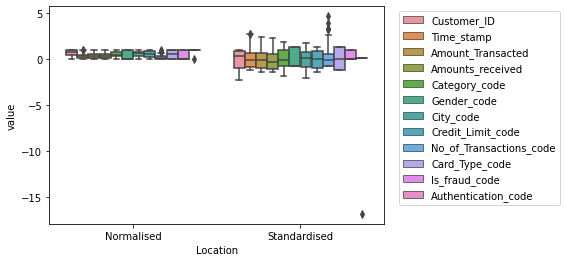

In [ ]:
#Comparing normalized and standardized data
df_normalized1 = df_norm.assign(Location="Normalised")
df_standardised1 = df_stand.assign(Location="Standardised")

#Combining the dataframes into 1 to have the box plot in one frame
cdf = pd.concat([df_normalized1, df_standardised1])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Variables'])

bx = sns.boxplot(x="Location", y="value", hue="Variables", data=mdf);    
bx.legend(bbox_to_anchor= (1.03, 1) );
plt.show()

## Model Training

### Equalizing the fraudulent and legitimate transactions
In all cases the fraudulent transactions are less than the legitimate transactions and so we equalize them below for the model.

In [ ]:
#For normalized Dataset
legit_norm= df_norm[df_norm.Is_fraud_code== 0]
fraud_norm = df_norm[df_norm.Is_fraud_code == 1]
print(legit_norm.shape)
print(fraud_norm.shape)

(146, 12)
(138, 12)


In [ ]:
#For standardised Dataset
legit_stand= df_stand[df_stand.Is_fraud_code== 0]
fraud_stand = df_stand[df_stand.Is_fraud_code == 1]
print(legit_stand.shape)
print(fraud_stand.shape)

(146, 12)
(138, 12)


In [ ]:
#Making the sample equal and recombining dataset
#Normalized dataset
legit_norm = legit_norm.sample(n = 138)
fraud_norm = fraud_norm.sample(n = 138)
df_normalized2 = pd.concat([legit_norm,fraud_norm], axis=0)
df_normalized2.info()

#Standardized dataset
legit_stand = legit_stand.sample(n = 138)
fraud_stand = fraud_stand.sample(n = 138)
df_standardised2 = pd.concat([legit_stand,fraud_stand], axis=0)
df_standardised2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 148 to 214
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              276 non-null    float64
 1   Time_stamp               276 non-null    float64
 2   Amount_Transacted        276 non-null    float64
 3   Amounts_received         276 non-null    float64
 4   Category_code            276 non-null    float64
 5   Gender_code              276 non-null    float64
 6   City_code                276 non-null    float64
 7   Credit_Limit_code        276 non-null    float64
 8   No_of_Transactions_code  276 non-null    float64
 9   Card_Type_code           276 non-null    float64
 10  Is_fraud_code            276 non-null    float64
 11  Authentication_code      276 non-null    float64
dtypes: float64(12)
memory usage: 28.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 16 to 163
Data columns (total 12

### Splitting data into Features and Targets
Because amount transacted and category were identified as not significant from the feature selection they were dropped from the model training.

#### Normalised data

In [ ]:
#Splitting the data into features and targets for normalised data
X_norm = df_normalized2.drop(['Is_fraud_code', 'Amount_Transacted', 'Category_code'], axis=1)
Y_norm = df_normalized2['Is_fraud_code']

In [ ]:
#Split data into testing and training data for normalised data
#We split the data by 20% test and 80%train
X_train, X_test, Y_train, Y_test = train_test_split(X_norm,Y_norm,test_size=0.2, stratify= Y_norm, random_state=2)
print(X_norm.shape,X_train.shape, X_test.shape)
print(Y_norm.shape, Y_train.shape, Y_test.shape)

(276, 9) (220, 9) (56, 9)
(276,) (220,) (56,)


#### Model Training and testing on normalized data

In [ ]:
#Model Training for normalised data
model = LogisticRegression( max_iter=1000)
#Training the logistic regression model with normalised training data 
model.fit(X_train, Y_train);

#Find the performance of the model with normalised data
#Accuracy Score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data", training_data_accuracy*100)

#Accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on test data", testing_data_accuracy*100)


Accuracy on training data 96.36363636363636
Accuracy on test data 94.64285714285714


The model trained on normalised data is 95% accurate on test data. 

In [ ]:
#Classification report
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        27
         1.0       0.96      0.93      0.95        29

    accuracy                           0.95        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56



Text(0.5, 33.0, 'Predicted Values')

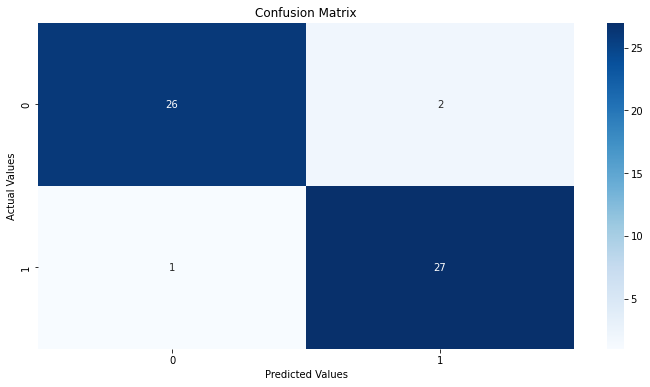

In [ ]:
#confusion matrix - A performance measurement for machine learning classification 
cm=confusion_matrix(Y_test,X_test_prediction)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

From the confusion matrix 26 transaction which were legitimate were predicted correctly by the model while 2 which were legitimate were wrongly predicted as fraud. 
1 transaction that was fraudulent was wrongly predicted as legitimate while 27 fraudulent transactions were correctly predicted as fraudulent. 

#### Standardized Data

In [ ]:
#Splitting the data into features and targets for standardised data
X_stand= df_standardised2.drop(['Is_fraud_code', 'Amount_Transacted', 'Category_code'], axis=1)
Y_stand = df_standardised2['Is_fraud_code']

In [ ]:
#Split data into testing and training data for standardised data
#We split the data by 20% test and 80%train
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_stand,Y_stand,test_size=0.2, stratify= Y_stand, random_state=2)
print(X_stand.shape,X_train2.shape, X_test2.shape)
print(Y_stand.shape, Y_train2.shape, Y_test2.shape)

(276, 9) (220, 9) (56, 9)
(276,) (220,) (56,)


##### Model training and testing on standardized data

In [ ]:
#Model Training for standardised data
model2 = LogisticRegression( max_iter=1000)
#Training the logistic regression model with standardised training data 
model2.fit(X_train2, Y_train2);

#Find the performance of the model with standardised data
#Accuracy Score on training data
X_train_prediction2 = model2.predict(X_train2)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train2)
print("Accuracy on training data", training_data_accuracy2*100)

#Accuracy on test data
X_test_prediction2 = model2.predict(X_test2)
testing_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test2)
print("Accuracy on test data", testing_data_accuracy2*100)


Accuracy on training data 97.27272727272728
Accuracy on test data 100.0


The model trained on standardised data, was 100% accurate on test data. 

In [ ]:
print(classification_report(X_test_prediction2, Y_test2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        28

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



Text(0.5, 33.0, 'Predicted Values')

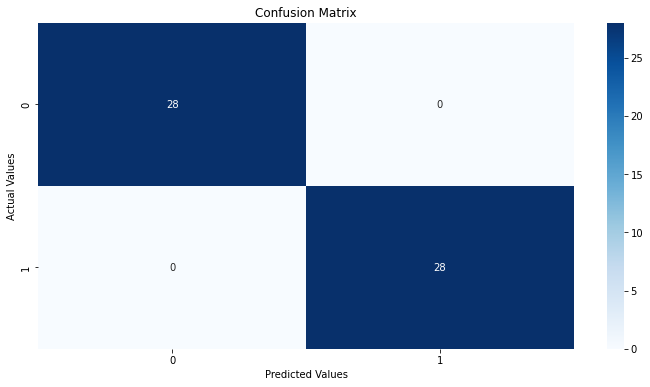

In [ ]:
#confusion matrix - A performance measurement for machine learning classification 
cm=confusion_matrix(Y_test2,X_test_prediction2)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

From the confusion matrix based on the standardized data, all legitimate and all fraudulent transactions were predicted correctly. 

**NOTE** The model trained on standardized data performed better than the model trained on normalised data. 

## Testing model on new customers
Two new customers were added and scaled their data to test if the model is accurate. Customer 1 named new_person is a legitimate transaction and customer 2 named new_person 2 is a fraudulent transaction. 

In [ ]:
#Adding scaled data on Customer 1
new_person = {
    'Customer_ID': -1.126864,
    'Time_stamp':2.376401,
    'Amounts_received':2.125112,
   'Gender_code':-0.783349,
    'City_code':-0.042234,
    'Credit_Limit_code':0.830747,
    'No_of_Transactions_code':0.540262,
    'Card_Type_code':0.004486,
    'Authentication_code':0.059444
}
new_person = pd.DataFrame([new_person])
new_person

,Customer_ID,Time_stamp,Amounts_received,Gender_code,City_code,Credit_Limit_code,No_of_Transactions_code,Card_Type_code,Authentication_code
0,-1.126864,2.376401,2.125112,-0.783349,-0.042234,0.830747,0.540262,0.004486,0.059444


In [ ]:
#Using the model trained on standardised data to predict whether or not new person's transaction is fraudulent. 
result=model.predict(new_person)
if result==1:
    print('Warning! This is a Fraudulent Transaction!')
else:
    print('This is a Legitimate Transaction')

This is a Legitimate Transaction


In [ ]:
#Adding scaled data on Customer 2
new_person_2 = {
    'Customer_ID': 0.965168,
    'Time_stamp':0.393679,
    'Amounts_received':-0.369617,
   'Gender_code':-0.783349,
    'City_code':-0.694995,
    'Credit_Limit_code':0.383906,
    'No_of_Transactions_code':-0.138651,
    'Card_Type_code':-1.269441,
    'Authentication_code':0.059444
}
new_person_2 = pd.DataFrame([new_person_2])
new_person_2

,Customer_ID,Time_stamp,Amounts_received,Gender_code,City_code,Credit_Limit_code,No_of_Transactions_code,Card_Type_code,Authentication_code
0,0.965168,0.393679,-0.369617,-0.783349,-0.694995,0.383906,-0.138651,-1.269441,0.059444


In [ ]:
#Using the model trained on standardised data to predict whether or not new person 2's transaction is fraudulent. 
result=model2.predict(new_person_2)
if result==1:
    print('Warning! This is a Fraudulent Transaction!')
else:
    print('This is a Legitimate Transaction')


Warning! This is a Fraudulent Transaction!


## Conclusion
As demonstrated above the model has successfully predicted fraudulent cases in credit card transactions through the following steps:
1. Retrieved relevant data on credit card transactions
2. Cleaned the data by correcting missing values and outliers
3. Identified the relevant features using pearson correlationa and backward elimination.
4. Normalized and standardized the data
5. Used customers information as attributes by labelling them as features in our model
6. Build a model, trained and tested the model
7. Then added information from 2 new customers and they were correctly identified as legitimate and fraudulent.